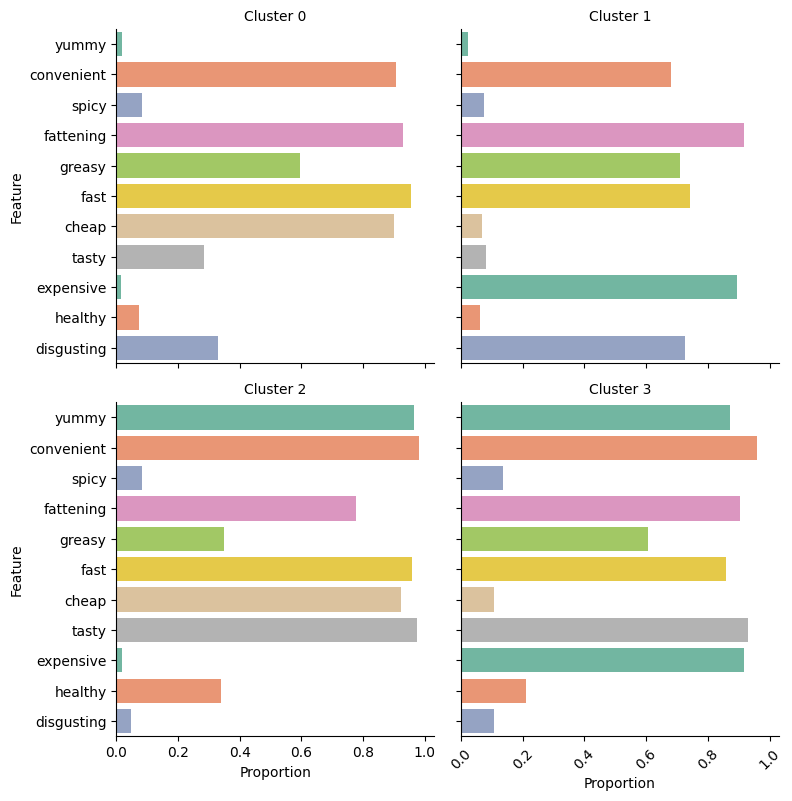

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

np.random.seed(1234)

df1 = pd.read_csv("/content/sample_data/mcdonalds.csv")

MD_x = df1.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
MD_x['Cluster'] = kmeans.fit_predict(MD_x)

relevant_columns = df1.columns[:11]
cluster_means = MD_x.groupby("Cluster")[relevant_columns].mean()

cluster_melted = cluster_means.reset_index().melt(id_vars="Cluster", var_name="Feature", value_name="Proportion")
g = sns.FacetGrid(cluster_melted, col="Cluster", col_wrap=2, sharex=True, sharey=True, height=4)
g.map_dataframe(sns.barplot, x="Proportion", y="Feature", palette="Set2")

g.set_axis_labels("Proportion", "Feature")
g.set_titles("Cluster {col_name}")

plt.xticks(rotation=45)
plt.show()

In [2]:
!pip install adjustText

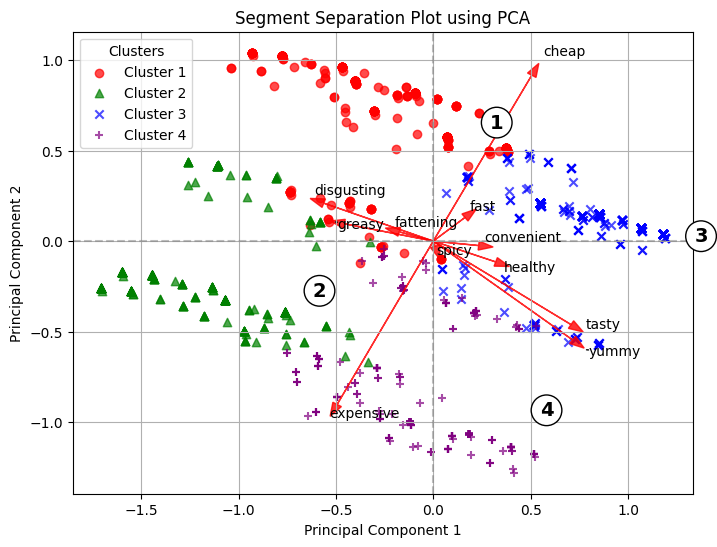

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from adjustText import adjust_text

np.random.seed(1234)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
clusters = kmeans.fit_predict(MD_x)

pca_df = pd.DataFrame(MD_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

markers = ["o", "^", "x", "+"]
colors = ["red", "green", "blue", "purple"]

plt.figure(figsize=(8, 6))
for cluster, marker, color in zip(range(4), markers, colors):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], marker=marker, color=color, label=f"Cluster {cluster+1}", alpha=0.7)

components = pca.components_.T * 1.5
texts = []

for i, feature in enumerate(df1.columns[:11]):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='red', alpha=0.8, head_width=0.05)
    text = plt.text(components[i, 0] * 1.1, components[i, 1] * 1.1, feature, color='black', fontsize=10)
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="black"))

cluster_centers = kmeans.cluster_centers_ @ pca.components_.T
for i, (x, y) in enumerate(cluster_centers):
    plt.text(x, y, str(i + 1), color="black", fontsize=14, fontweight="bold",
             bbox=dict(facecolor="white", edgecolor="black", boxstyle="circle"))

plt.axhline(0, linestyle="--", color="gray", alpha=0.5)
plt.axvline(0, linestyle="--", color="gray", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot using PCA")
plt.grid()
plt.legend(title="Clusters")
plt.show()